In [60]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt
import argparse
import tensorflow as tf 
from tensorflow import keras
from keras.utils import to_categorical
from keras import regularizers

In [14]:
#read images
negative = cv2.imread("margin_rodent.jpg")
positive = cv2.imread("tumor_human.jpg")

bw_negative = cv2.cvtColor(negative, cv2.COLOR_BGR2GRAY)
bw_positive = cv2.cvtColor(positive, cv2.COLOR_BGR2GRAY)
print(type(bw_negative))
print(bw_negative.shape)
print(bw_positive.shape)

<class 'numpy.ndarray'>
(1104, 1376)
(1104, 1376)


In [15]:
cube_size_gray = np.array([negative.shape[0]/16, negative.shape[1]/16,1])
cube_size_gray = cube_size_gray.astype("int")
print(cube_size_gray)

[69 86  1]


In [16]:
random_index = np.arange(69*86*2)
np.random.shuffle(random_index)

image_vector = np.concatenate((bw_negative, bw_positive), axis=1)
temp = np.zeros(69*86)
temp1 = np.zeros(69*86) + 1
results_vector = np.concatenate((temp, temp1))

test_ind = random_index[0:int(len(random_index)*0.2)]
train_ind = random_index[int(len(random_index)*0.2):-1]

print(test_ind.shape)
print(train_ind.shape)



(2373,)
(9494,)


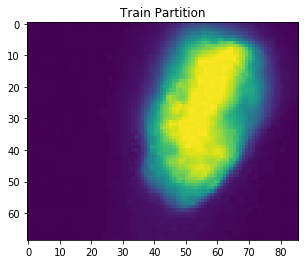

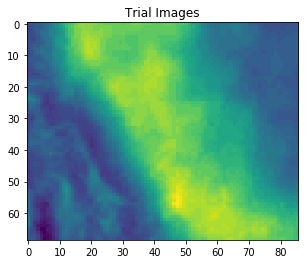

Train Array Shape: (9494, 23736)
Trial Array Shape: (2373, 23736)
Categorical Data Matrix Dimension: (2373, 2)


In [17]:
transform_train = []
transform_test = []



for i in test_ind:
    y_ind = int(np.floor(i/bw_negative.shape[1]))
    x_ind = int(i % bw_negative.shape[1])
    
    #for bugging
    if (x_ind > bw_negative.shape[1] or y_ind > bw_negative.shape[0]):
        print("error")
    
    temp = image_vector[y_ind:y_ind + cube_size_gray[0], x_ind:x_ind + cube_size_gray[1]]
    
    if(i == 9415 or i == 8192 or i == 7227):
    
        plt.title("Train Partition")
        plt.imshow(temp)
        plt.show()
        
    temp = np.ndarray.flatten(temp.repeat(2,axis=1).repeat(2,axis=0))
    transform_test.append(temp)
    
for i in train_ind:
    y_ind = int(np.floor(i/bw_negative.shape[1]))
    x_ind = int(i % bw_negative.shape[1])
    
    #for bugging
    if (x_ind > bw_negative.shape[1] or y_ind > bw_negative.shape[0]):
        print("error")
    
    temp = image_vector[y_ind:y_ind + cube_size_gray[0], x_ind:x_ind + cube_size_gray[1]]
 
    if(i == 10313 or i == 22 or i == 7376):
    
        plt.title("Trial Images")
        plt.imshow(temp)
        plt.show()
        
    temp = np.ndarray.flatten(temp.repeat(2,axis=1).repeat(2,axis=0))
    transform_train.append(temp)
    
    
train_array = np.array(transform_train)    
test_array = np.array(transform_test)  
mean = train_array.mean()
#step for normalization
train_array = np.array(transform_train) - mean
test_array = np.array(transform_test) -mean


print("Train Array Shape: " + str(train_array.shape))    
print("Trial Array Shape: " + str(test_array.shape))


vals_ind_train = results_vector[train_ind]
vals_ind_test = results_vector[test_ind]


vals_ind_train = to_categorical(vals_ind_train.flatten())
vals_ind_test = to_categorical(vals_ind_test.flatten())
print("Categorical Data Matrix Dimension: " + str(vals_ind_test.shape))

# Basic Neural Network

In [120]:
model = keras.Sequential([
    keras.layers.Dense(256, kernel_initializer="normal",kernel_regularizer=regularizers.l2(0.0001),  activation="sigmoid", input_dim = 4* 5934),
    #keras.layers.Dense(, activation=tf.nn.relu),
    keras.layers.Dense(256,kernel_regularizer=regularizers.l2(0.0001), activation="relu"),
    keras.layers.Dropout(0.2),
    #keras.layers.Dense(, activation="relu"),
    keras.layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
    keras.layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
    #keras.layers.Dense(16, activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(2, activation="sigmoid")
])


In [121]:
opt = "adam"
model.compile(optimizer=opt, 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [122]:
vals_ind_train 
history = model.fit(train_array,vals_ind_train , batch_size=400, epochs=200, verbose = 1)

Epoch 1/200
9494/9494 [==============================] - 6s 585us/sample - loss: 2.2326 - acc: 0.5166
Epoch 2/200
9494/9494 [==============================] - 4s 446us/sample - loss: 2.0665 - acc: 0.5469
Epoch 3/200
9494/9494 [==============================] - 4s 443us/sample - loss: 1.8997 - acc: 0.5458
Epoch 4/200
9494/9494 [==============================] - 4s 444us/sample - loss: 1.7600 - acc: 0.5527
Epoch 5/200
9494/9494 [==============================] - 4s 445us/sample - loss: 1.6341 - acc: 0.5729
Epoch 6/200
9494/9494 [==============================] - 4s 445us/sample - loss: 1.5523 - acc: 0.5602
Epoch 7/200
9494/9494 [==============================] - 4s 453us/sample - loss: 1.4847 - acc: 0.5597
Epoch 8/200
9494/9494 [==============================] - 4s 448us/sample - loss: 1.4239 - acc: 0.5687
Epoch 9/200
9494/9494 [==============================] - 4s 453us/sample - loss: 1.3686 - acc: 0.5770
Epoch 10/200
9494/9494 [==============================] - 4s 454us/sample - loss: 

Epoch 80/200
9494/9494 [==============================] - 4s 448us/sample - loss: 1.0679 - acc: 0.6810
Epoch 81/200
9494/9494 [==============================] - 4s 449us/sample - loss: 1.0744 - acc: 0.6762
Epoch 82/200
9494/9494 [==============================] - 4s 450us/sample - loss: 1.0536 - acc: 0.6962
Epoch 83/200
9494/9494 [==============================] - 4s 447us/sample - loss: 1.0556 - acc: 0.6865
Epoch 84/200
9494/9494 [==============================] - 4s 446us/sample - loss: 1.0425 - acc: 0.6906
Epoch 85/200
9494/9494 [==============================] - 4s 450us/sample - loss: 1.0423 - acc: 0.6988
Epoch 86/200
9494/9494 [==============================] - 4s 449us/sample - loss: 1.0472 - acc: 0.6945
Epoch 87/200
9494/9494 [==============================] - 4s 448us/sample - loss: 1.0471 - acc: 0.6940
Epoch 88/200
9494/9494 [==============================] - 4s 448us/sample - loss: 1.0515 - acc: 0.6956
Epoch 89/200
9494/9494 [==============================] - 4s 451us/sample

9494/9494 [==============================] - 4s 444us/sample - loss: 1.0719 - acc: 0.6869
Epoch 159/200
9494/9494 [==============================] - 4s 446us/sample - loss: 1.0593 - acc: 0.7003s - loss: 1.0587 - acc: 0.70
Epoch 160/200
9494/9494 [==============================] - 4s 445us/sample - loss: 1.0660 - acc: 0.6960
Epoch 161/200
9494/9494 [==============================] - 4s 445us/sample - loss: 1.0566 - acc: 0.7084
Epoch 162/200
9494/9494 [==============================] - 4s 445us/sample - loss: 1.0722 - acc: 0.6881
Epoch 163/200
9494/9494 [==============================] - 4s 445us/sample - loss: 1.0723 - acc: 0.6952
Epoch 164/200
9494/9494 [==============================] - 4s 445us/sample - loss: 1.0657 - acc: 0.7021
Epoch 165/200
9494/9494 [==============================] - 4s 446us/sample - loss: 1.0804 - acc: 0.6919
Epoch 166/200
9494/9494 [==============================] - 4s 444us/sample - loss: 1.0783 - acc: 0.6886
Epoch 167/200
9494/9494 [=========================

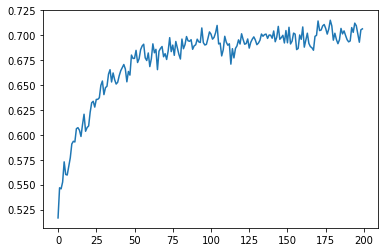

In [123]:
plt.plot(history.history["acc"])

In [124]:
score = model.evaluate(test_array, vals_ind_test) #89% thus far

2373/2373 [==============================] - 2s 650us/sample - loss: 1.0230 - acc: 0.7295


In [128]:
#k-folds
model.save("model.h5")


In [130]:
model = keras.models.load_model('model.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 256)               6076672   
_________________________________________________________________
dense_118 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_119 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_120 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_121 (Dense)            (None, 2)                 258       
Total params: 6,241,410
Trainable params: 6,241,410
Non-trainable params: 0
_________________________________________________________________


In [131]:
score = model.evaluate(test_array, vals_ind_test)

2373/2373 [==============================] - 2s 677us/sample - loss: 1.0230 - acc: 0.7295


# Linear Regressor Prediction 